## Settings and options

In [16]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Options set
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 0)

# Default theme for matplotlib set
sns.set_theme()

## Bulk data transformation

In [17]:
# Database engine is created
engine = sa.create_engine('mssql://GBWADJ8HJ293/LIMS?driver=SQL+Server+Native+Client+10.0?trusted_connection=yes')

# Dataframe is read from database
#df=pd.read_sql("SELECT * FROM TRIAL WHERE Lot= 'PR18900' AND Pallet=1", engine)
df=pd.read_sql("SELECT * FROM TRIAL WHERE Product='SORB-AC43'", engine)
# df=pd.read_sql("SELECT * FROM TRIAL", engine)

# Dataframe is inspected to ensure data has been read properly
df

,Product,Date,Lot,Pallet,Appearance,APS_d50,D90,Loss_at_1000,Loss_USP_Dental,Loss_at_105,Loss_at_145,pH_5,Harrison_Equivalent,Y_Lightness,colour,Tapped_Bulk_Density,Oil_Adsorption_Linseed,_45µm_Wet_sieve,Perspex_Abrasion_Value,F_COMP,F_PPM,CL_PERCENT,SO4,Water_solubles,SiO2_by_XRF,Al2O3_TM01a,Fe_TM01a,As_TM01a,Pb_TM01a,Cd_TM01a,Sb_TM01a,THM_TM20a,TVC,TFC_Moulds_and_Yeasts,Staphylococcus_aureaus,E_coli,Pseudomonas_spp,D10,_250_Wet_Sieve,Foreign_Bodies,SO4_CL,Hg_TM20a,Cd_TM21,Cr_TM21,Co_TM21,Ni_TM21,Sb_TM21,Candida_albicans,Bile_tolerant_gram_negative_organisms,_45_m_Wet_sieve,Sodium_Sulphate,Transmission_1_437_RI,Transmission_1_443_RI,Solution_1_RI,Solution_1_Tr,Solution_2_RI,Solution_2_Tr,Solution_3_RI,Solution_3_Tr,Solution_4_RI,Solution_4_Tr,Peak_RI,Peak_Tr,BDL,Oil_Adsorption_GSK,Einlhener_Abrasion_Value,Oil_Absorption,Transmission_1_446_RI,Transmission_1_454_RI,Ganz_Whiteness,_45µm_Wet_sieve1,CVP_3_95_microns,Sodium_Chloride,NACL_NA2SO4,Assay,Al2O3_TM01g,Mg_TM01a,Co_TM01a,Cr_TM01a,Ni_TM01a,V_TM01a,QBT_Water_Absorption,Transmission_1_448_RI,Viscosity_10_Slurry,Transmission_1_440_RI,_106_710_fraction,_710µm_Dry_sieve,_106_micron_Dry_sieve,Foreign_Bodies_Dry_method,Na2O,Loss_USP,Lightness,MAT_60,MAT_85,HEGMAN,COMMENT,OSP,Soluble_Ionisable_Salts,D99,Pore_Volume_Nitrogen,Carbon,calcium,FTIR_Identity,L,A,B,CIE94_deltaE,Colour_Bleed,_710_m_Dry_sieve,_0_500_mm_Dry_sieve,_180_m_dry_sieve,_106_m_Dry_sieve,_850_micron_dry_sieve
0,SORB-AC43,2018-01-01 07:00:00,MR18040,1,PASS,3.670000076,7.309999943,6.800000191,5.900000095,0.899999976,1.700000048,7.199999809,100,92.63999939,100,335,62,0.001,21.10000038,96,<8,0.01,0.050000001,None,99.40000153,830,240,0.01,0.109999999,None,None,1.620000005,0,0,0,0,0,1.5,None,1,None,0.219999999,0,1.980000019,0.109999999,0.560000002,0,None,0,None,0.07,None,None,1.443099976,41,1.447299957,79.69999695,1.453199983,92.40000153,1.45630002,68.09999847,1.451099992,98,None,None,None,None,None,86,None,99.99900055,50.20000076,0,0.100000001,99.40000153,None,14.13000011,None,None,None,None,None,86,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,SORB-AC43,2018-01-01 09:00:00,MR18040,2,None,3.660000086,7.300000191,None,None,None,1.700000048,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.49000001,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,SORB-AC43,2018-01-01 11:00:00,MR18040,4,None,3.660000086,7.309999943,None,None,None,1.700000048,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,SORB-AC43,2018-01-01 13:00:00,MR18040,6,None,3.660000086,7.309999943,None,None,None,1.700000048,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,0,None,None,None,1.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No

In [18]:
# Rows without transmission data is dropped from dataset. Assumption: all rows without data for df["Solution_1_Tr"] contain
# no transmission data at all.
df.dropna(subset=["Solution_1_Tr"], inplace=True)

In [19]:
# Dataframe is inspected after having blank rows dropped
df

,Product,Date,Lot,Pallet,Appearance,APS_d50,D90,Loss_at_1000,Loss_USP_Dental,Loss_at_105,Loss_at_145,pH_5,Harrison_Equivalent,Y_Lightness,colour,Tapped_Bulk_Density,Oil_Adsorption_Linseed,_45µm_Wet_sieve,Perspex_Abrasion_Value,F_COMP,F_PPM,CL_PERCENT,SO4,Water_solubles,SiO2_by_XRF,Al2O3_TM01a,Fe_TM01a,As_TM01a,Pb_TM01a,Cd_TM01a,Sb_TM01a,THM_TM20a,TVC,TFC_Moulds_and_Yeasts,Staphylococcus_aureaus,E_coli,Pseudomonas_spp,D10,_250_Wet_Sieve,Foreign_Bodies,SO4_CL,Hg_TM20a,Cd_TM21,Cr_TM21,Co_TM21,Ni_TM21,Sb_TM21,Candida_albicans,Bile_tolerant_gram_negative_organisms,_45_m_Wet_sieve,Sodium_Sulphate,Transmission_1_437_RI,Transmission_1_443_RI,Solution_1_RI,Solution_1_Tr,Solution_2_RI,Solution_2_Tr,Solution_3_RI,Solution_3_Tr,Solution_4_RI,Solution_4_Tr,Peak_RI,Peak_Tr,BDL,Oil_Adsorption_GSK,Einlhener_Abrasion_Value,Oil_Absorption,Transmission_1_446_RI,Transmission_1_454_RI,Ganz_Whiteness,_45µm_Wet_sieve1,CVP_3_95_microns,Sodium_Chloride,NACL_NA2SO4,Assay,Al2O3_TM01g,Mg_TM01a,Co_TM01a,Cr_TM01a,Ni_TM01a,V_TM01a,QBT_Water_Absorption,Transmission_1_448_RI,Viscosity_10_Slurry,Transmission_1_440_RI,_106_710_fraction,_710µm_Dry_sieve,_106_micron_Dry_sieve,Foreign_Bodies_Dry_method,Na2O,Loss_USP,Lightness,MAT_60,MAT_85,HEGMAN,COMMENT,OSP,Soluble_Ionisable_Salts,D99,Pore_Volume_Nitrogen,Carbon,calcium,FTIR_Identity,L,A,B,CIE94_deltaE,Colour_Bleed,_710_m_Dry_sieve,_0_500_mm_Dry_sieve,_180_m_dry_sieve,_106_m_Dry_sieve,_850_micron_dry_sieve
0,SORB-AC43,2018-01-01 07:00:00,MR18040,1,PASS,3.670000076,7.309999943,6.800000191,5.900000095,0.899999976,1.700000048,7.199999809,100,92.63999939,100,335,62,0.001,21.10000038,96,<8,0.01,0.050000001,None,99.40000153,830,240,0.01,0.109999999,None,None,1.620000005,0,0,0,0,0,1.5,None,1,None,0.219999999,0,1.980000019,0.109999999,0.560000002,0,None,0,None,0.07,None,None,1.443099976,41,1.447299957,79.69999695,1.453199983,92.40000153,1.45630002,68.09999847,1.451099992,98,None,None,None,None,None,86,None,99.99900055,50.20000076,0,0.100000001,99.40000153,None,14.13000011,None,None,None,None,None,86,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
12,SORB-AC43,2018-01-02 07:00:00,MR18041,4,PASS,3.670000076,7.300000191,6.599999905,5.800000191,0.800000012,2,7.199999809,100,93.23000336,100,334,60,0.001,18.79999924,95,8,0.01,0.050000001,None,99.30000305,718,210,0.140000001,0.109999999,None,None,2.140000105,0,0,None,None,None,1.50999999,None,0,None,0.189999998,0.01,1.99000001,0.109999999,0.569999993,0,None,None,None,0.07,None,None,1.443300009,40.5,1.447399974,77.69999695,1.453299999,89.80000305,1.456400037,67.40000153,1.451300025,96,None,None,None,None,None,84,None,99.99900055,58.40000153,0,0.100000001,99.30000305,None,12.43999958,None,None,None,None,None,84,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
21,SORB-AC43,2018-01-03 07:00:00,MR18042,4,PASS,3.700000048,7.369999886,6.800000191,5.5,1.299999952,1.899999976,7.199999809,100,91.91999817,100,320,61,0.001,19.70000076,95,<8,0.01,0.050000001,None,99.30000305,807,235,0.129999995,0.129999995,None,None,2.150000095,0,0,0,0,0,1.50999999,None,0,None,0.119999997,0.01,2.049999952,0.109999999,0.569999993,0,None,0,None,0.07,None,None,1.442800045,37.09999847,1.447600007,77,1.453600049,88.80000305,1.456599951,67.80000305,1.452000022,92,None,None,None,None,None,87,None,99.99900055,49.56000137,0,0.100000001,99.30000305,None,13.84000015,None,None,None,None,None,80,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
27,SORB-AC43,2018-01-04 07:00:00,MR18043,4,PASS,3.660000086,7.320000172,6.900000095,6,0.899999976,1.899999976,7.199999809,100,93.01999664,100,332,60,0.001,20.70000076,95,10,0.01,0.050000001,None,99.30000305,756,218,0.07,0.100000001,None,None,2.220000029,0,0,None,None,None,1.48000001

In [20]:
# Columns that are not needed are dropped. Data and all transmission data is kept.
df=df[["Date", "Product", "Lot", "Pallet", "Solution_1_RI", "Solution_1_Tr", "Solution_2_RI", "Solution_2_Tr", "Solution_3_RI", "Solution_3_Tr", "Solution_4_RI", "Solution_4_Tr", "Peak_RI", "Peak_Tr"]]

# df inspected to ensure correctness
df

,Date,Product,Lot,Pallet,Solution_1_RI,Solution_1_Tr,Solution_2_RI,Solution_2_Tr,Solution_3_RI,Solution_3_Tr,Solution_4_RI,Solution_4_Tr,Peak_RI,Peak_Tr
0,2018-01-01 07:00:00,SORB-AC43,MR18040,1,1.443099976,41,1.447299957,79.69999695,1.453199983,92.40000153,1.45630002,68.09999847,1.451099992,98
12,2018-01-02 07:00:00,SORB-AC43,MR18041,4,1.443300009,40.5,1.447399974,77.69999695,1.453299999,89.80000305,1.456400037,67.40000153,1.451300025,96
21,2018-01-03 07:00:00,SORB-AC43,MR18042,4,1.442800045,37.09999847,1.447600007,77,1.453600049,88.80000305,1.456599951,67.80000305,1.452000022,92
27,2018-01-04 07:00:00,SORB-AC43,MR18043,4,1.442899942,37.90000153,1.44749999,77.40000153,1.453500032,92,1.456200004,69.80000305,1.451500058,98
28,2018-01-04 11:00:00,SORB-AC43,PT17177,261,1.442899942,38.5,1.447399974,76.30000305,1.453099966,89.40000153,1.456200004,65.80000305,1.450899959,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,2020-04-27 07:00:00,SORB-AC43,AP20123,1,1.443099976,34.20000076,1.447600007,74.40000153,1.453600049,94.59999847,1.456500053,72.40000153,1.452499986,97
5544,2020-04-27 13:00:00,SORB-AC43,PT20117,292,1.443300009,34.20000076,1.447600007,72.59999847,1.453400016,94.30000305,1.456900001,71.19999695,1.452399969,96
5546,2020-04-27 15:00:00,SORB-AC43,MR20123,1,1.443699956,38.70000076,1.447700024,78.19999695,1.453600049,93.5,1.456400037,70.59999847,1.452000022,96
5552,2020-04-28 07:00:00,SORB-AC43,MR20124,5,1.443699956,37.09999847,1.44780004,78.59999847,1.453600049,92.90000153,1.456799984,67,1.451500058,97


## Single batch

In [21]:
# First row of dataframe is selected
df_try=df.iloc[[0]]

# First row of data is melted successive columns (Tr1, Tr2, RI1, RI2) converted to rows
df_try=df_try.melt(id_vars=["Product", "Lot", "Date", "Pallet"], var_name="Variable", value_name="Value")

# Dataframe is inspected to ensure melt is sucessful
df_try["Value"]=pd.to_numeric(df_try["Value"])

df_try

,Product,Lot,Date,Pallet,Variable,Value
0,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_1_RI,1.443100
1,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_1_Tr,41.000000
2,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_2_RI,1.447300
3,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_2_Tr,79.699997
4,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_3_RI,1.453200
5,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_3_Tr,92.400002
6,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_4_RI,1.456300
7,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_4_Tr,68.099998
8,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Peak_RI,1.451100
9,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Peak_Tr,98.000000


In [22]:
# Every other row is sliced (starting from 0) to extract RI data and saved to RI series, ser_RI
df_RI=df_try[::2]

# ser_RI index reset to allow for concatenation later
df_RI.reset_index(inplace=True)

# Value Column is renamed to RI
df_RI.rename(columns={"Value":"RI"}, inplace=True)

# ser_RI converted to dataframe, df_RI
#ser_RI=df_RI[["RI"]]

# df_RI printed to ensure correctness
df_RI

,index,Product,Lot,Date,Pallet,Variable,RI
0,0,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_1_RI,1.4431
1,2,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_2_RI,1.4473
2,4,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_3_RI,1.4532
3,6,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_4_RI,1.4563
4,8,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Peak_RI,1.4511


In [23]:
# Every other row is sliced (starting from 1) to extract Transmission data and saved to Transmission series, ser_T
df_T=df_try[1::2]

# ser_T index reset to allow for concatenation later
df_T.reset_index(inplace=True)

# Value Column is renamed to T
df_T.rename(columns={"Value":"T"}, inplace=True)

# ser_RI converted to dataframe, df_RI
#df_T=ser_T[["T"]]

# df_T printed to ensure correctness
df_T

,index,Product,Lot,Date,Pallet,Variable,T
0,1,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_1_Tr,41.000000
1,3,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_2_Tr,79.699997
2,5,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_3_Tr,92.400002
3,7,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Solution_4_Tr,68.099998
4,9,SORB-AC43,MR18040,2018-01-01 07:00:00,1,Peak_Tr,98.000000


In [24]:
# df_RI and df_T are concatenated together along columns to form full data table, df
df=pd.concat([df_RI,df_T["T"]], join="outer", axis=1)

# df converted to numeric
df=df.drop(columns="index")

df["Variable"]=df["Variable"].str.strip("_Tr_RI")

# T_max and RI(T_max) sliced out of df
df_pred=df[-1:]
df_pred.iloc[:,4]="Manual_max"
df=df[:-1]

# df printed to ensure correctness
df

Product=df.iloc[0,0]
Batch= df.iloc[0,1] + " P" +df.iloc[0,3]


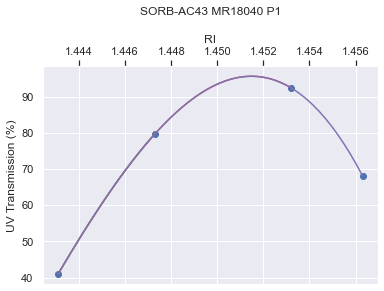

In [25]:
# Polyfit of the RI and T performed using cubic polynomial
coeff=np.polyfit(df["RI"], df["T"], 3)
poly=np.poly1d(coeff)

# Limits set from start of RI to the end of RI
x=np.linspace(df["RI"][0], df["RI"])

# Polynomial values array is created
y=poly(x)

# fig and ax initialised 
fig, ax = plt.subplots()

# Two columns are plotted along with polynomial
plt.plot(df["RI"],df["T"], "o", x, y)

# Labels added and x axis set to the top
plt.xlabel("RI")
plt.ylabel("UV Transmission (%)")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_title(Product + " " + Batch, pad=20)

# Display plot
plt.show()

In [26]:
# y_max is found
y_max=np.amax(y)

# Index of y_max is found
y_max_ind=np.where(y==np.amax(y))

# x at the max value of y, x_at_y_max is found
x_at_y_max=x[y_max_ind]

# x_at_y_max converted from single element array to float
x_at_y_max=x_at_y_max[0]

# y_max and x_at_y_max are printed
y_max, x_at_y_max

(95.5988907366991, 1.451451024244898)

In [27]:
df_computed=df.iloc[1]
df_computed.iloc[[4,5,6]]=["Computed_max", x_at_y_max, y_max]
df=df.append(df_pred, ignore_index=True)
df=df.append(df_computed, ignore_index=True)
df_app=df

In [28]:
# outname=Batch + ".csv"

# outdir=r"C:\Users\tom.whittington\Documents\Transmissions" + "\\" + Product
# if not os.path.exists(outdir):
#     os.mkdir(outdir)

# df.to_csv(outdir + "\\" + outname, index=False)